In [555]:


import pandas as pd
import numpy as np
import random as rnd
from scipy.stats import  skew,norm
import statsmodels.api as sm


# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

#Some styling
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")

import plotly.io as pio
pio.templates.default = "gridon"

#Subplots
from plotly.subplots import make_subplots

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [556]:
#Importing data for training and testing

x_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
x_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
y_train = np.array(x_train['SalePrice'].copy())
#avoid preprocess data separately
all_data = [x_train,x_test]

In [557]:
# x_train.head()

In [558]:
# x_test.head()

In [559]:


# print('-Number of dimensions of training dataset',x_train.ndim)

# print('-Training dataset dimensions ',x_train.shape)

# print('-Training dataset columns names',x_train.columns.values)

# print(' Training dataset infos',x_train.info(verbose=True))



In [560]:
# print('-Number of dimensions of test dataset',x_test.ndim)

# print('-test dataset dimensions ',x_test.shape)

# print('-test dataset columns names',x_test.columns.values)

# print(' test dataset infos',x_test.info(verbose=True))

# 3 data types float64(11), int64(26), object(43)
# Some in variables has discrete values 
==> it would be better to change them to categorical variables
# Some features contains a lot of missing values 



In [561]:
x_train.drop(columns=['Id'],axis=1,inplace=True)
x_test.drop(columns=['Id'],axis=1,inplace=True)

In [562]:
#show duplicated rows
x_train[x_train.duplicated()]


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [563]:
#show duplicated rows

x_test[x_test.duplicated()]


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


# No duplicated rows in training and test dataset

In [564]:
# x_train.describe().T

# OverallCond 50 % of samples had 5 or less as rating 

In [565]:

# x_train.describe(include=['O']).T

# Some values of some feature are dominante
#  'Street : 1454 Pave of 1460 '

In [566]:
#, skewness measure of how much a random variable deviates from the normal distribution.

x_train.skew()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
SalePrice         1.882876
d

# LotArea MiscVal PoolArea LowQualFinSF 3SsnPorch : Are highly positively skewed
==>higher number of data points having low values ==>model will perform better at predicting lower
# ID is  perfectly symmetrical

In [567]:
# x_train.info()

In [568]:
#Since we have many feature, to make detecting missing values easier, we will visualize it in a plot 

def missing_val (df):
    list1 = list(df.isna().sum())
    lst= []
    i=0
    for col in df.columns:
        second_lst = [col,list1[i]]
        lst.append(second_lst)
        i+=1
    temp_df = pd.DataFrame(data=lst,columns=['Column_Name','Missing_Values'])
    temp_df = temp_df[temp_df['Missing_Values']>0]
    fig = px.bar(temp_df.sort_values(by='Missing_Values'),x='Missing_Values',y='Column_Name',
             orientation='h',height=1500,width=900,color='Missing_Values',text='Missing_Values',title='Missing values')
    fig.update_traces(textposition='outside')
    fig.show()


In [569]:
missing_val(x_train)

    


In [570]:
missing_val(x_test)

# Starting imputation of numerical features
If there are outliers in  a feature ==> fill them with their median values. if not then mean.
to know if there is outliers ==> boxplot

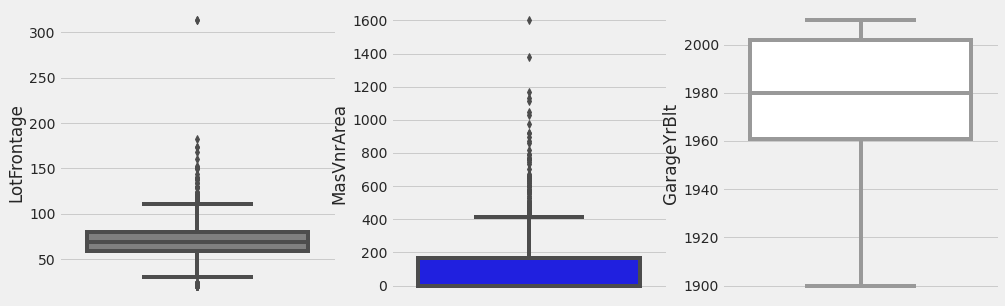

In [571]:

plt.figure(figsize=(15,5))

feat_check = ['LotFrontage','MasVnrArea','GarageYrBlt']
temp = x_train[feat_check]
colors=['','grey','blue','white']
i=1
for col in temp.columns:
    plt.subplot(1,3,i)
    a1 = sns.boxplot(data=temp,y=col,color=colors[i])
    i+=1

In [572]:
#filling the missing values with median
for col in feat_check:
    x_train[col].fillna(x_train[col].median(),inplace=True)
for col in feat_check:
    x_test[col].fillna(x_test[col].median(),inplace=True)

In [573]:

# x_train[feat_check].isna().sum()

In [574]:
# x_test[feat_check].isna().sum()

# Imputation of categorical features 

In [575]:
cat_missing = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType','GarageFinish',
'GarageQual','GarageCond','BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual','MasVnrType', 'Electrical']

# PoolQC,MiscFeature,Alley and Fence contains more than 1k missing values 


In [576]:
# x_train['PoolQC'].value_counts().plot(kind='pie', autopct='%.2f')

 According to the dataset description : NA in PoolQC means No Pool available

In [577]:
x_train['PoolQC'] = x_train['PoolQC'].fillna('NA')
x_test['PoolQC'] = x_test['PoolQC'].fillna('NA')

In [578]:
# x_train['PoolQC'].value_counts()

In [579]:
# x_train['MiscFeature'].value_counts().plot(kind='pie', autopct='%.2f')

 According to the dataset description : NA in MiscFeature means No Miscellaneous feature available


In [580]:
x_train['MiscFeature'] = x_train['MiscFeature'].fillna('NA')
x_test['MiscFeature'] = x_test['MiscFeature'].fillna('NA')

In [581]:
# x_train['MiscFeature'].value_counts()

In [582]:
# x_train['Alley'].value_counts().plot(kind='pie', autopct='%.2f')

According to the dataset description : NA in Alley means No Alley access

In [583]:
x_train['Alley'] = x_train['Alley'].fillna('NA')
x_test['Alley'] = x_test['Alley'].fillna('NA')

In [584]:
# x_train['Alley'].value_counts()

In [585]:
# x_train['Fence'].value_counts().plot(kind='pie', autopct='%.2f')


According to the dataset description : NA in Fence means No Fence available

In [586]:
x_train['Fence'] = x_train['Fence'].fillna('NA')
x_test['Fence'] = x_test['Fence'].fillna('NA')


In [587]:
# x_train['Fence'].value_counts()

In [588]:
# x_train['FireplaceQu'].value_counts()

According to the dataset description : NA means no fireplace available


In [589]:
x_train['FireplaceQu'] = x_train['FireplaceQu'].fillna('NA')
x_test['FireplaceQu'] = x_test['FireplaceQu'].fillna('NA')

In [590]:
# x_train['FireplaceQu'].value_counts().plot(kind='pie', autopct='%.2f')

In [591]:
# x_train['GarageType'].value_counts().plot(kind='pie', autopct='%.2f')

 According to the dataset description : NA in GarageType, GarageFinish, GarageQual and GarageCond means no Garage available

In [592]:
fill_garage = ['GarageType','GarageFinish','GarageQual','GarageCond']

for i in fill_garage : 
    x_train[i] = x_train[i].fillna('NA')
    x_test[i] = x_test[i].fillna('NA')

In [593]:
# x_train[fill_garage].isna().sum()

In [594]:
# x_test[fill_garage].isna().sum()

In [595]:
# x_train['BsmtQual'].value_counts().plot(kind='pie', autopct='%.2f')


 According to the dataset description : NA in BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond and BsmtQual means no Basement available

In [596]:
fill_Bsmt = ['BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual']

for i in fill_Bsmt : 
    x_train[i] = x_train[i].fillna('NA')
    x_test[i] = x_test[i].fillna('NA')

In [597]:
# x_train[fill_Bsmt].isna().sum()

In [598]:
# x_test[fill_Bsmt].isna().sum()

In [599]:
# x_train['MasVnrType'].value_counts().plot(kind='pie', autopct='%.2f')


In [600]:
# x_train[x_train['MasVnrType'].isnull()][['MasVnrType','MasVnrArea']]

samples with nan value for MasVnrType, have 0 MasVnrArea 
===> No Masonry veneer area 

In [601]:
x_train['MasVnrType'] = x_train['MasVnrType'].fillna('None')
x_test['MasVnrType'] = x_test['MasVnrType'].fillna('None')

In [602]:
# x_train['Electrical'].value_counts().plot(kind='pie', autopct='%.2f')


No information available about non values in Electrical feature in dataset description
Since it is cateogrical feature ==> fill them with most frequent value

In [603]:
x_train['Electrical'].fillna('SBrkr',inplace=True)
x_test['Electrical'].fillna('SBrkr',inplace=True)

In [604]:
#check if there any missing values left 

# x_train.isna().sum().sum()

In [605]:
# x_test.isna().sum().sum()

Stilll some missing values left in test dataset

In [606]:
missing_val(x_test)

In [607]:
miss_test = ['MSZoning', 'Utilities','BsmtFullBath','BsmtHalfBath','Functional','Exterior1st','Exterior2nd', 'BsmtFinSF1',
'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','KitchenQual','GarageCars','GarageArea','SaleType']
x_test[miss_test].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1455 non-null   object 
 1   Utilities     1457 non-null   object 
 2   BsmtFullBath  1457 non-null   float64
 3   BsmtHalfBath  1457 non-null   float64
 4   Functional    1457 non-null   object 
 5   Exterior1st   1458 non-null   object 
 6   Exterior2nd   1458 non-null   object 
 7   BsmtFinSF1    1458 non-null   float64
 8   BsmtFinSF2    1458 non-null   float64
 9   BsmtUnfSF     1458 non-null   float64
 10  TotalBsmtSF   1458 non-null   float64
 11  KitchenQual   1458 non-null   object 
 12  GarageCars    1458 non-null   float64
 13  GarageArea    1458 non-null   float64
 14  SaleType      1458 non-null   object 
dtypes: float64(8), object(7)
memory usage: 171.1+ KB


In [608]:
categorical = [i for i in miss_test if x_test[i].dtype=='O']
categorical

['MSZoning',
 'Utilities',
 'Functional',
 'Exterior1st',
 'Exterior2nd',
 'KitchenQual',
 'SaleType']

No information available about nan values in these features 

==> fill them with most frequent value

In [609]:
for i in categorical:
    x_test[i] = x_test[i].fillna(x_test[i].mode()[0])

In [610]:
x_test[categorical].isna().sum()

MSZoning       0
Utilities      0
Functional     0
Exterior1st    0
Exterior2nd    0
KitchenQual    0
SaleType       0
dtype: int64

In [611]:
numerical = [i for i in miss_test if x_test[i].dtype!='O']
numerical

['BsmtFullBath',
 'BsmtHalfBath',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'GarageCars',
 'GarageArea']

In [612]:
for i in numerical:
    x_test[i] = x_test[i].fillna(x_test[i].median())

In [613]:
x_test[numerical].isna().sum()

BsmtFullBath    0
BsmtHalfBath    0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
GarageCars      0
GarageArea      0
dtype: int64

In [614]:
x_test.isna().sum().sum()

0

In [615]:
# x_train['SalePrice'].describe()

# The average  Sale price id 180921
# Sale price is between 34900 and 755000
# half of samples have a Sale price <= 163000

In [616]:
# figure, ax = plt.subplots(1,2, figsize = (20,8))
# sns.stripplot(data=x_train,  y='SalePrice', ax = ax[0])
# sns.boxplot(data=x_train,y='SalePrice', ax = ax[1])
# plt.show()

In [617]:
#     print('mean', np.round(np.mean(x_train['SalePrice']), 2))
#     print('median', np.round(np.median(x_train['SalePrice']), 2))

In [618]:
# Getting the main parameters of the Normal Ditribution ()
# (mu, sigma) = norm.fit(x_train['SalePrice'])





# plt.suptitle(" SalePrice distribution vs Normal Distribution", fontsize= 15)
# plt.xlabel("House's sale Price in $", fontsize = 12)
# plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)])

# sns.distplot(x_train['SalePrice'], kde = True, hist=True, fit = norm)
# plt.show()

# The distribution does not seem to be normal, but highly right-skewed

 Skewness = 1.882876 

In [619]:
# x_train2 = np.log1p(x_train['SalePrice'])

# plt.suptitle("qq-plot & distribution SalePrice ", fontsize= 15)

# sns.distplot(x_train2, kde = True, hist=True, fit = norm)
# plt.show()

# Log of SalePrice resembles a normal distribution


In [620]:
# x_train2.skew()

In [621]:
cat_summary = x_train.describe(include=[object]).transpose()
categorical_columns = cat_summary.index.tolist()
numerical_columns = x_train.select_dtypes(include=[np.number]).drop(columns=['SalePrice']).columns.tolist()
uniqueValCount=x_train[numerical_columns].nunique()
numerical_discrete=uniqueValCount[uniqueValCount<50].index.tolist()
date_columns = ['YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold']
discrete_columns = [col for col in numerical_discrete if col not in date_columns]
continuous_columns = [col for col in numerical_columns if col not in discrete_columns+date_columns]

In [622]:
def plot_bar(df, columns):
    cols = 3
    rows = len(columns) // 3 + 1

    plt.figure(figsize=(cols * 6.7, rows * 3.75))
    i = 0
    for row in range(rows):
        for col in range(cols):
            index = cols * row + col
            if index >= len(columns):
                break
            plt.subplot(rows, cols, index + 1,)
            df.groupby(columns[i]).size().plot(
                kind="bar",
            )
            
            i += 1
            plt.tight_layout() 

# plotting box
def plot_box(df, y, columns):
    cols = 3
    rows = len(columns) // 3 + 1

    plt.figure(figsize=(cols * 5.5, rows * 3.5))
    i = 0
    for row in range(rows):
        for col in range(cols):
            index = cols * row + col
            if index >= len(columns):
                break
            plt.subplot(rows, cols, index + 1)
            sns.boxplot(x=columns[i], y=y, data=df)

            i += 1
            plt.tight_layout() 
# plotting strip plot
       
def strip_plot(df, y, columns):
    cols = 3
    rows = len(columns) // 3 + 1

    plt.figure(figsize=(cols * 5.5, rows * 3.5))
    i = 0
    for row in range(rows):
        for col in range(cols):
            index = cols * row + col
            if index >= len(columns):
                break
            plt.subplot(rows, cols, index + 1)
            sns.stripplot(x=columns[i], y=y, data=df)

            i += 1
            plt.tight_layout() 
# plotting hist
def plot_hist(df, columns):
    cols = 3
    rows = len(columns) // 3 + 1

    plt.figure(figsize=(cols * 5.5, rows * 3.5))
    i = 0
    for row in range(rows):
        for col in range(cols):
            index = cols * row + col
            if index >= len(columns):
                break
            plt.subplot(rows, cols, index + 1)
            df[columns[i]].hist(bins=50)
            plt.ylabel(columns[i])

            i += 1
            plt.tight_layout() 




In [623]:
# plot_bar(x_train,categorical_columns+date_columns+discrete_columns)

In [624]:
# strip_plot(x_train,'SalePrice',categorical_columns+date_columns+discrete_columns)

In [625]:
# plot_hist(x_train,continuous_columns)


In [626]:
# plot_box(x_train,'SalePrice',categorical_columns+date_columns+discrete_columns)


Street, Utilities,PoolQC,Poolarea not corr with saleprice since one value is the dominante value 

Pool in house doesn't increase price 
centralair in house increase price 
House's price increase with TotRmsAbvGrd,fullbath,overallqual,
garageCars,YearBUilt, GarageYrBlt,YearRemodadd


YrSold, moSold doesn't increase price

In [627]:
# fig, ax = plt.subplots(figsize=(20,7))
# sns.heatmap(x_train[numerical_columns+['SalePrice']].corr(), cmap='coolwarm', annot=True, annot_kws={'size':10}, )
# plt.show()

overallqual/grlivarea/garagecars/garagearea high correlation with target

enclosedporch kitchenabvgr low negative correlation with target 

 



In [628]:
# sns.regplot(x='OverallQual', y='SalePrice', data=x_train, robust=True)


it seems, there is a linear relationship between OverallQual and SalePrice


In [629]:
# sns.regplot(x='GrLivArea', y='SalePrice', data=x_train, robust=True)


it seems, there is a linear relationship between grlivarea and SalePrice


In [630]:
# sns.regplot(x='GarageArea', y='SalePrice', data=x_train, robust=True)


In [631]:
# sns.regplot(x='TotRmsAbvGrd', y='SalePrice', data=x_train, robust=True)



In [632]:
# sns.regplot(x='TotalBsmtSF', y='SalePrice', data=x_train, robust=True)


In [633]:
x_train['TotalSF'] = x_train['TotalBsmtSF'] + x_train['1stFlrSF'] + x_train['2ndFlrSF']
x_test['TotalSF'] = x_test['TotalBsmtSF'] + x_test['1stFlrSF'] + x_test['2ndFlrSF']


In [634]:
continuous_columns = continuous_columns +['TotalSF']


In [635]:
skewed_features  = x_train[continuous_columns +discrete_columns +date_columns+['SalePrice']].apply(lambda x: stats.skew(x)).sort_values(ascending=False)
skewed_features = skewed_features[abs(skewed_features )> 1]
skewed_features
skew_index = skewed_features.index

for i in skew_index:
    x_train[i] = np.log1p(x_train[i])


In [636]:
skew_index

Index(['MiscVal', 'PoolArea', 'LotArea', '3SsnPorch', 'LowQualFinSF',
       'KitchenAbvGr', 'BsmtFinSF2', 'ScreenPorch', 'BsmtHalfBath',
       'EnclosedPorch', 'MasVnrArea', 'LotFrontage', 'OpenPorchSF',
       'SalePrice', 'TotalSF', 'BsmtFinSF1', 'WoodDeckSF', 'TotalBsmtSF',
       'MSSubClass', '1stFlrSF', 'GrLivArea'],
      dtype='object')

In [637]:
skew_index_test = skew_index.drop('SalePrice')

In [638]:
for i in skew_index_test:
    x_test[i] = np.log1p(x_test[i])

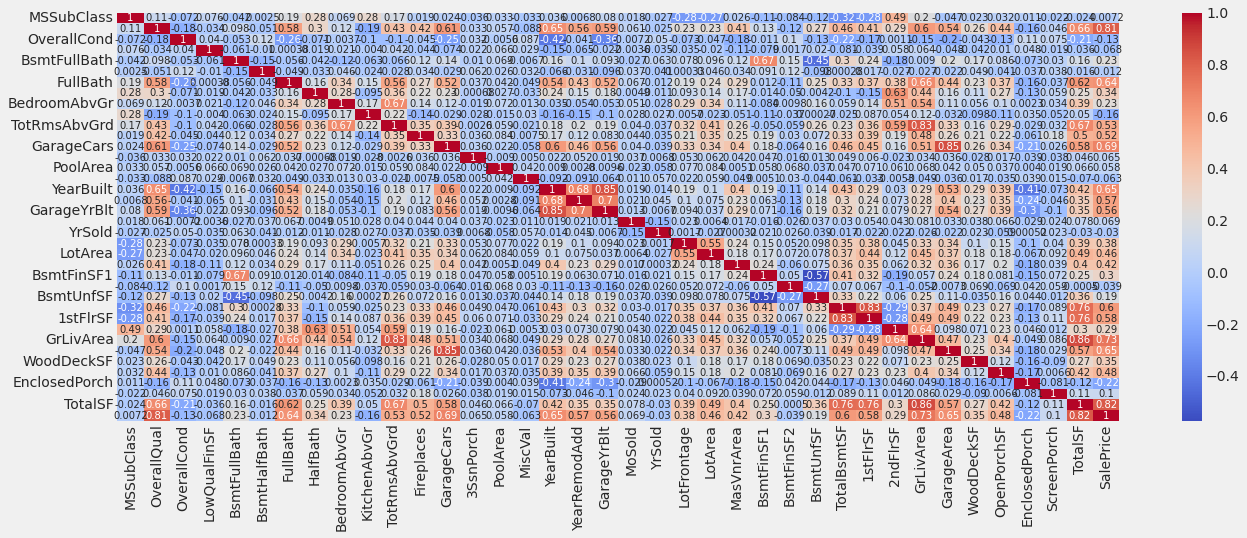

In [639]:
fig, ax = plt.subplots(figsize=(20,7))
sns.heatmap(x_train[discrete_columns+ date_columns+continuous_columns+['SalePrice']].corr(method="spearman"), cmap='coolwarm', annot=True, annot_kws={'size':10}, )
plt.show()

In [640]:
categorical = []

for col in x_train.columns:
    if x_train[col].dtype=='O':
        categorical.append(col)

In [641]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()

label_encoders = {}
for column in categorical:
    label_encoders[column] = LabelEncoder()
    x_train[column] = label_encoders[column].fit_transform(x_train[column])

In [642]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()

label_encoders = {}
for column in categorical:
    label_encoders[column] = LabelEncoder()
    x_test[column] = label_encoders[column].fit_transform(x_test[column])

In [643]:

columns_x=x_train.columns
columns_x

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [644]:
from sklearn.feature_selection import SelectKBest, f_regression
x_train2 = x_train.drop(['SalePrice'], axis=1)
select_reg =  SelectKBest(k=30, score_func=f_regression)
select_reg.fit( x_train2, x_train['SalePrice'])               
X_train_housing_new = select_reg.transform(x_train2)
X_train_housing_new.shape


(1460, 30)

In [645]:
kept_features = pd.DataFrame({'columns': x_train2.columns,
                              'Kept': select_reg.get_support()})
kept_features[kept_features['Kept']==True]
new_x_train = x_train2.iloc[:,select_reg.get_support()]
new_x_train.columns


Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'TotalBsmtSF',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'TotalSF'],
      dtype='object')

In [646]:
x_test= x_test.iloc[:,select_reg.get_support()]

In [647]:
# new_x_train2 = new_x_train.join(x_train['SalePrice'])
new_x_train2 = new_x_train
new_x_train2

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,Foundation,BsmtQual,TotalBsmtSF,...,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,TotalSF
0,4.189655,9.042040,7,2003,2003,5.283204,2,2,2,6.753438,...,1,2003.0,2,2,548,5,2,0.000000,4.127134,7.850493
1,4.394449,9.169623,6,1976,1976,0.000000,3,1,2,7.141245,...,1,1976.0,2,2,460,5,2,5.700444,0.000000,7.833996
2,4.234107,9.328212,7,2001,2002,5.093750,2,2,2,6.825460,...,1,2001.0,2,2,608,5,2,0.000000,3.761200,7.903596
3,4.110874,9.164401,7,1915,1970,0.000000,3,0,4,6.629363,...,5,1998.0,3,3,642,5,2,0.000000,3.583519,7.813592
4,4.442651,9.565284,8,2000,2000,5.860786,2,2,2,7.044033,...,1,2000.0,2,3,836,5,2,5.262690,4.442651,8.114923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.143135,8.976894,6,1999,2000,0.000000,3,2,2,6.860664,...,1,1999.0,2,2,460,5,2,0.000000,3.713572,7.863651
1456,4.454347,9.486152,6,1978,1988,4.787492,3,1,2,7.341484,...,1,1978.0,3,2,500,5,2,5.857933,0.000000,8.193124
1457,4.204693,9.109746,7,1941,2006,0.000000,0,4,4,7.050123,...,1,1941.0,2,1,252,5,2,0.000000,4.110874,8.158516
1458,4.234107,9.181735,5,1950,1996,0.000000,3,1,4,6.983790,...,1,1950.0,3,1,240,5,2,5.905362,0.000000,7.676474


In [648]:
columns_x = new_x_train2.columns

In [649]:
columns_x_test = x_test.columns
columns_x_test

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'TotalBsmtSF',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'TotalSF'],
      dtype='object')

In [650]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
new_x_train2=scaler.fit_transform(new_x_train2)

new_x_train2 = pd.DataFrame(new_x_train2,columns=[columns_x])

In [651]:
columns_test = x_test.columns

scaler=StandardScaler()
x_test=scaler.fit_transform(x_test)

x_test = pd.DataFrame(x_test,columns=[columns_test])

In [652]:
x_test.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,Foundation,BsmtQual,TotalBsmtSF,...,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,TotalSF
0,0.623823,0.561787,-0.751101,-0.340945,-1.072885,-0.780195,0.673548,-0.533007,1.008900,0.056019,...,-0.766829,-0.653107,0.930000,-0.988189,1.185921,0.29175,0.339114,0.968486,-1.093550,-0.976751
1,0.661410,0.970407,-0.054877,-0.439695,-1.214908,1.015602,0.673548,-0.533007,1.008900,0.395932,...,-0.766829,-0.769806,0.930000,-0.988189,-0.741235,0.29175,0.339114,1.365515,0.581419,0.311355
2,0.388069,0.908413,-0.751101,0.844059,0.678742,-0.780195,0.673548,0.833702,-0.514106,0.098161,...,-0.766829,0.747276,-1.543031,0.301406,0.042537,0.29175,0.339114,1.127876,0.555642,0.187241
3,0.547237,0.257857,-0.054877,0.876976,0.678742,0.385215,0.673548,0.833702,1.008900,0.096373,...,-0.766829,0.786176,-1.543031,0.301406,-0.012788,0.29175,0.339114,1.331718,0.581419,0.153231
4,-1.245577,-1.116969,1.337571,0.679475,0.394694,-0.780195,-0.734340,0.833702,-0.514106,0.364781,...,-0.766829,0.552779,0.105656,0.301406,0.153187,0.29175,0.339114,-0.943556,0.956184,0.190998


In [334]:
# corr_mat = x_train2[continuous_columns+categorical_columns+date_columns].join(x_train['SalePrice']).corr(method='spearman')
# selected_continuous_columns = corr_mat['SalePrice'][abs(corr_mat['SalePrice'])>=0.5].index.tolist()
# nonselected_continuous_columns = corr_mat['SalePrice'][abs(corr_mat['SalePrice'])<0.5].index.tolist()
# selected_continuous_columns

In [335]:
         
# def calculateAnova(inpData,y, catCols, target):
#     inpData = inpData.join(y)
#     from scipy.stats import f_oneway
#     CatColumnList = []
#     for cat in catCols:
#         CatGroupList = inpData.groupby(cat)[target].apply(list)
#         anova = f_oneway(*CatGroupList)
#         if(anova[1]<0.05):
#             print('The column ', cat, ' is correlated with ', target, ' | P-Value: ',anova[1])
#             CatColumnList.append(cat)
#         else:
#             print('The column ', cat , ' is NOT correlated with ', target, ' | P-Value: ',anova[1])
    
#     return(CatColumnList)

In [336]:
# y = x_train.pop("SalePrice")
# selected_categorical_cols = calculateAnova(x_train,y,categorical_columns+ nonselected_continuous_columns  +date_columns+discrete_columns,'SalePrice')
# selected_categorical_cols

In [337]:
# selected_col = [col for col in X.columns \
#  if col in selected_continuous_columns + selected_categorical_cols]
# X = X[selected_col].copy()
# X_test = X_test[selected_col].copy()

In [338]:
# from sklearn.feature_selection import mutual_info_regression
# def make_mi_scores(X, y):
#     '''Estimate mutual information for a continuous target variable.'''
#     X = X.copy()
#     for colname in X.select_dtypes(["object", "category"]):
#         X[colname], _ = X[colname].factorize()
#     # All discrete features should now have integer dtypes
#     discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
#     mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
#     mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
#     mi_scores = mi_scores.sort_values(ascending=False)
#     return mi_scores
# mi_scores = make_mi_scores(X, y)
# mi_scores.head()
# def plot_mi_scores(scores):
#     scores = scores.sort_values(ascending=True)
#     width = np.arange(len(scores))
#     ticks = list(scores.index)
#     plt.figure(figsize=(10,15))
#     clrs = ['grey' if (x < 0.01) else 'blue' for x in scores ]
#     plt.barh(width, scores, color=clrs)
#     plt.yticks(width, ticks)
#     plt.title("Mutual Information Scores")
# plot_mi_scores(mi_scores)

In [654]:
X = new_x_train2
# X = new_x_train2.drop(columns=['SalePrice'],axis=1)

y= x_train['SalePrice']


In [655]:
X

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,Foundation,BsmtQual,TotalBsmtSF,...,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,TotalSF
0,-0.078896,-0.133270,0.651479,1.050994,0.878668,1.203619,-0.777976,0.835599,-0.566939,0.002513,...,-0.768736,1.017598,0.103495,0.311725,0.351000,0.295349,0.289745,-0.946701,0.845209,0.151951
1,0.572719,0.113413,-0.071836,0.156734,-0.429577,-0.806841,0.663451,-0.549162,-0.566939,0.341114,...,-0.768736,-0.107927,0.103495,0.311725,-0.060731,0.295349,0.289745,1.249540,-1.072916,0.099298
2,0.062541,0.420049,0.651479,0.984752,0.830215,1.131524,-0.777976,0.835599,-0.566939,0.065397,...,-0.768736,0.934226,0.103495,0.311725,0.631726,0.295349,0.289745,-0.946701,0.675137,0.321443
3,-0.329561,0.103317,0.651479,-1.863632,-0.720298,-0.806841,0.663451,-1.933923,0.997770,-0.105819,...,1.301075,0.809167,0.942959,1.650307,0.790804,0.295349,0.289745,-0.946701,0.592558,0.034171
4,0.726089,0.878431,1.374795,0.951632,0.733308,1.423411,-0.777976,0.835599,-0.566939,0.256237,...,-0.768736,0.892540,0.103495,1.650307,1.698485,0.295349,0.289745,1.080884,0.991848,0.995943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.226913,-0.259231,-0.071836,0.918511,0.733308,-0.806841,0.663451,0.835599,-0.566939,0.096134,...,-0.768736,0.850854,0.103495,0.311725,-0.060731,0.295349,0.289745,-0.946701,0.653002,0.193949
1456,0.763303,0.725429,-0.071836,0.222975,0.151865,1.014981,0.663451,-0.549162,-0.566939,0.515947,...,-0.768736,-0.024555,0.942959,0.311725,0.126420,0.295349,0.289745,1.310217,-1.072916,1.245540
1457,-0.031048,-0.002359,0.651479,-1.002492,1.024029,-0.806841,-3.660830,3.605121,0.997770,0.261554,...,-0.768736,-1.566941,0.103495,-1.026858,-1.033914,0.295349,0.289745,-0.946701,0.837652,1.135082
1458,0.062541,0.136833,-0.795151,-0.704406,0.539493,-0.806841,0.663451,-0.549162,0.997770,0.203637,...,-0.768736,-1.191766,0.942959,-1.026858,-1.090059,0.295349,0.289745,1.328490,-1.072916,-0.403474


In [657]:
selected_feat = X.columns
print(selected_feat)

MultiIndex([( 'LotFrontage',),
            (     'LotArea',),
            ( 'OverallQual',),
            (   'YearBuilt',),
            ('YearRemodAdd',),
            (  'MasVnrArea',),
            (   'ExterQual',),
            (  'Foundation',),
            (    'BsmtQual',),
            ( 'TotalBsmtSF',),
            (   'HeatingQC',),
            (  'CentralAir',),
            (    '1stFlrSF',),
            (    '2ndFlrSF',),
            (   'GrLivArea',),
            (    'FullBath',),
            (    'HalfBath',),
            ( 'KitchenQual',),
            ('TotRmsAbvGrd',),
            (  'Fireplaces',),
            (  'GarageType',),
            ( 'GarageYrBlt',),
            ('GarageFinish',),
            (  'GarageCars',),
            (  'GarageArea',),
            (  'GarageCond',),
            (  'PavedDrive',),
            (  'WoodDeckSF',),
            ( 'OpenPorchSF',),
            (     'TotalSF',)],
           )


In [658]:
X = X[selected_feat].reset_index(drop=True)

In [659]:
X

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,Foundation,BsmtQual,TotalBsmtSF,...,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,TotalSF
0,-0.078896,-0.133270,0.651479,1.050994,0.878668,1.203619,-0.777976,0.835599,-0.566939,0.002513,...,-0.768736,1.017598,0.103495,0.311725,0.351000,0.295349,0.289745,-0.946701,0.845209,0.151951
1,0.572719,0.113413,-0.071836,0.156734,-0.429577,-0.806841,0.663451,-0.549162,-0.566939,0.341114,...,-0.768736,-0.107927,0.103495,0.311725,-0.060731,0.295349,0.289745,1.249540,-1.072916,0.099298
2,0.062541,0.420049,0.651479,0.984752,0.830215,1.131524,-0.777976,0.835599,-0.566939,0.065397,...,-0.768736,0.934226,0.103495,0.311725,0.631726,0.295349,0.289745,-0.946701,0.675137,0.321443
3,-0.329561,0.103317,0.651479,-1.863632,-0.720298,-0.806841,0.663451,-1.933923,0.997770,-0.105819,...,1.301075,0.809167,0.942959,1.650307,0.790804,0.295349,0.289745,-0.946701,0.592558,0.034171
4,0.726089,0.878431,1.374795,0.951632,0.733308,1.423411,-0.777976,0.835599,-0.566939,0.256237,...,-0.768736,0.892540,0.103495,1.650307,1.698485,0.295349,0.289745,1.080884,0.991848,0.995943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.226913,-0.259231,-0.071836,0.918511,0.733308,-0.806841,0.663451,0.835599,-0.566939,0.096134,...,-0.768736,0.850854,0.103495,0.311725,-0.060731,0.295349,0.289745,-0.946701,0.653002,0.193949
1456,0.763303,0.725429,-0.071836,0.222975,0.151865,1.014981,0.663451,-0.549162,-0.566939,0.515947,...,-0.768736,-0.024555,0.942959,0.311725,0.126420,0.295349,0.289745,1.310217,-1.072916,1.245540
1457,-0.031048,-0.002359,0.651479,-1.002492,1.024029,-0.806841,-3.660830,3.605121,0.997770,0.261554,...,-0.768736,-1.566941,0.103495,-1.026858,-1.033914,0.295349,0.289745,-0.946701,0.837652,1.135082
1458,0.062541,0.136833,-0.795151,-0.704406,0.539493,-0.806841,0.663451,-0.549162,0.997770,0.203637,...,-0.768736,-1.191766,0.942959,-1.026858,-1.090059,0.295349,0.289745,1.328490,-1.072916,-0.403474


In [660]:
y


0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [661]:
x_test = x_test[selected_feat].reset_index(drop=True)

In [662]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y )
Y_pred = lm.predict(x_test)
acc_log = round(lm.score(X , y) * 100, 2)
acc_log

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



87.15

In [663]:
Y_pred2 = np.exp(Y_pred)
Y_pred2

array([120374.22338077, 160975.45457027, 185652.29679516, ...,
       168096.95928019, 125471.08539015, 235686.4355989 ])

In [664]:
sample = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")
sample

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [666]:
from IPython.display import HTML
sample['SalePrice'] = Y_pred2

sample.to_csv('submission.csv', index=False)

def create_download_link(title = "Download CSV file", filename = "data.csv"):  
    html = '<a href={filename}>{title}</a>'
    html = html.format(title=title,filename=filename)
    return HTML(html)

# create a link to download the dataframe which was saved with .to_csv method
create_download_link(filename='submission.csv')